<a href="https://colab.research.google.com/github/Thujaina/NIT-Internship/blob/main/categorical_CE%2Blabel_smoothing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install imblearn

In [2]:
!pip install seaborn

In [3]:
!pip install -U tensorflow scikeras imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 71.5 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.19.0
    Uninstalling tensorboard-2.19.0:
      Successfully uninstalled tensorboard-2.19.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.19.0
    Uninstalling tensorflow-2.19.0:
      Successfully uninstalled tensorflow-2.19.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.19.0 requires tensorflow<2.20,>=2.19.0, but you have tensorflow 2.20.0 which is incompatible.
tf-keras 2.19.0 requires tensorflow<2.20,>=2.19, but you have tensorflow 2.20.0 which is incompatible.
tensorflow-decision-forests 1.12.0 requires tensorflow==2.19.0, but you have tensorflow 2.20.0 which is inc

In [4]:
!pip install scikeras

In [5]:
!pip install -U scikit-learn scikeras tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 35.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.losses import CategoricalCrossentropy

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, matthews_corrcoef

from imblearn.over_sampling import SMOTE
from scikeras.wrappers import KerasClassifier

import warnings
warnings.filterwarnings("ignore")


In [7]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [8]:
TRAIN_PATH = "/content/drive/MyDrive/datasets/ECG/mitbih_train.csv"
TEST_PATH  = "/content/drive/MyDrive/datasets/ECG/mitbih_test.csv"

train = pd.read_csv(TRAIN_PATH, header=None)
test  = pd.read_csv(TEST_PATH, header=None)

print("Train shape:", train.shape)
print("Test shape:", test.shape)


Train shape: (87554, 188)
Test shape: (21892, 188)


In [9]:
X_train = train.iloc[:, :-1]
y_train = train.iloc[:, -1]

X_test = test.iloc[:, :-1]
y_test = test.iloc[:, -1]


In [10]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)


In [11]:
y_res_cat  = to_categorical(y_res, num_classes=5)
y_test_cat = to_categorical(y_test, num_classes=5)


In [12]:
X_train, X_val, y_train, y_val = train_test_split(
    X_res, y_res_cat, test_size=0.2, random_state=0
)


In [13]:
label_smoothing_factor = 0.1
loss_fn = CategoricalCrossentropy(label_smoothing=label_smoothing_factor)


In [14]:
def ann_model():
    model = Sequential([
        Dense(128, activation="relu", input_shape=(X_train.shape[1],)),
        Dense(64, activation="relu"),
        Dense(5, activation="softmax")
    ])

    model.compile(
        optimizer="adam",
        loss=loss_fn,
        metrics=["accuracy"]
    )

    return model


In [15]:
model = ann_model()

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=64
)


Epoch 1/10
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 29s 6ms/step - accuracy: 0.8512 - loss: 0.7021 - val_accuracy: 0.9513 - val_loss: 0.5163
Epoch 2/10
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9563 - loss: 0.5021 - val_accuracy: 0.9702 - val_loss: 0.4749
Epoch 3/10
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 32s 7ms/step - accuracy: 0.9722 - loss: 0.4696 - val_accuracy: 0.9752 - val_loss: 0.4652
Epoch 4/10
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9790 - loss: 0.4548 - val_accuracy: 0.9786 - val_loss: 0.4546
Epoch 5/10
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.9834 - loss: 0.4449 - val_accuracy: 0.9828 - val_loss: 0.4438
Epoch 6/10
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.9861 - loss: 0.4387 - val_accuracy: 0.9866 - val_loss: 0.4371
Epoch 7/10
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.9877 - loss: 0.4340 - val_accuracy: 0.9883 - val_loss: 0.4330
Epoch 8/10
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9893 - loss: 0

In [16]:
y_val_pred = np.argmax(model.predict(X_val), axis=1)
y_val_true = np.argmax(y_val, axis=1)

mcc = matthews_corrcoef(y_val_true, y_val_pred)
print("Validation MCC:", mcc)


2265/2265 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
Validation MCC: 0.9847081891687481


In [17]:
test_predictions = model.predict(X_test)
test_loss, test_acc = model.evaluate(X_test, y_test_cat)

print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)


685/685 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
685/685 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9758 - loss: 0.4642
Test Accuracy: 0.9667001366615295
Test Loss: 0.48347386717796326


In [18]:
print(
    classification_report(
        np.argmax(y_test_cat, axis=1),
        np.argmax(test_predictions, axis=1)
    )
)


              precision    recall  f1-score   support

           0       0.99      0.98      0.98     18118
           1       0.66      0.80      0.72       556
           2       0.94      0.93      0.93      1448
           3       0.45      0.86      0.59       162
           4       0.98      0.97      0.97      1608

    accuracy                           0.97     21892
   macro avg       0.80      0.91      0.84     21892
weighted avg       0.97      0.97      0.97     21892



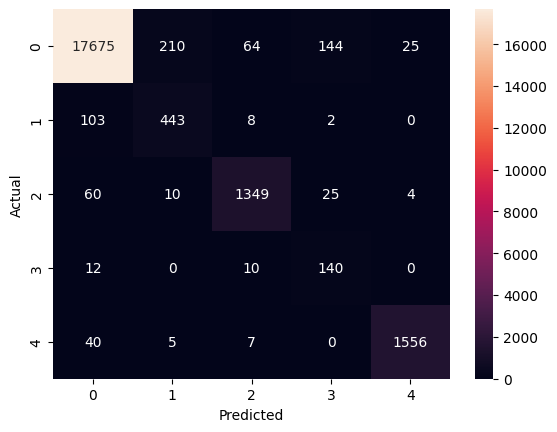

In [19]:
cm = confusion_matrix(
    np.argmax(y_test_cat, axis=1),
    np.argmax(test_predictions, axis=1)
)

sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [20]:
estimator = KerasClassifier(
    model=ann_model,
    epochs=10,
    batch_size=64,
    verbose=0
)

kfold = KFold(n_splits=4, shuffle=True, random_state=42)

results = cross_val_score(
    estimator,
    X_res,
    y_res_cat,
    cv=kfold,
    scoring="accuracy"
)

print("Cross-validation scores:", results)
print("Mean CV accuracy:", results.mean())


Cross-validation scores: [0.98861893 0.99100332 0.98977801 0.99109154]
Mean CV accuracy: 0.9901229484030493
